In [14]:
import numpy as np
from numpy.random import default_rng
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
if False:
    st1, et1 = int(tconvert('2019-05-01 0:00:00')), int(tconvert('2019-06-01 0:00:00'))
    et1a = int(tconvert('2019-08-01 0:00:00'))
    st2, et2 = int(tconvert('2020-02-01 0:00:00')), int(tconvert('2020-03-01 0:00:00'))

In [28]:
ifos = ['L1', 'H1', 'V1']
ml_types = ['Tomte','Blip','Koi_Fish','Blip_Low_Frequency']

In [29]:
gspy = pd.read_json('../data/gspy-3month.json')
sel = [x in ml_types for x in gspy['ml_label']]
gspy = gspy[sel]

/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


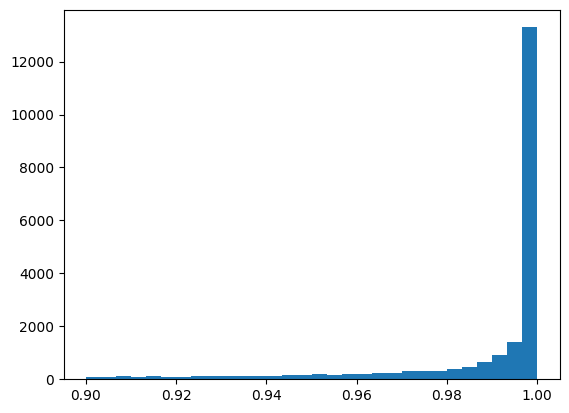

In [30]:
plt.hist(gspy['ml_confidence'], bins=30);

In [31]:
# Jitter the frequencies to make the plots smooth
rng = default_rng(seed=42)
jitter = rng.normal(size=len(gspy))
jitter[jitter<-2]=-2.
jitter[jitter>2]=2.
gspy['peak_frequency'] = np.exp(np.log(gspy['peak_frequency'])+0.07*jitter)

In [32]:
for ifo in ifos:
    for mlt in ml_types:
        print(ifo, mlt, len(gspy.query(f"ifo == '{ifo}' and ml_label == '{mlt}'")))

L1 Tomte 8033
L1 Blip 999
L1 Koi_Fish 2249
L1 Blip_Low_Frequency 3537
H1 Tomte 306
H1 Blip 1708
H1 Koi_Fish 2813
H1 Blip_Low_Frequency 546
V1 Tomte 186
V1 Blip 506
V1 Koi_Fish 278
V1 Blip_Low_Frequency 0


(5, 2000.0)

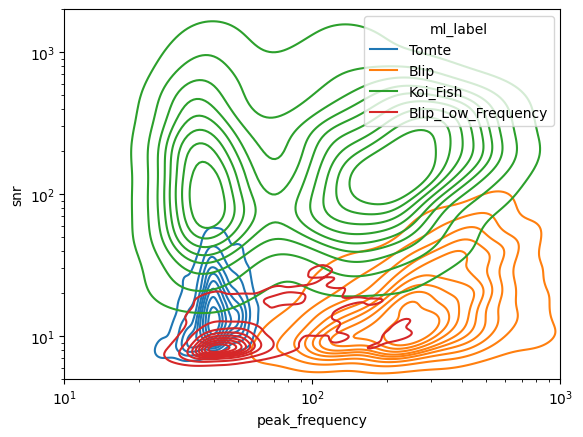

In [37]:
sns.kdeplot(gspy.query("ifo == 'L1'"),
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

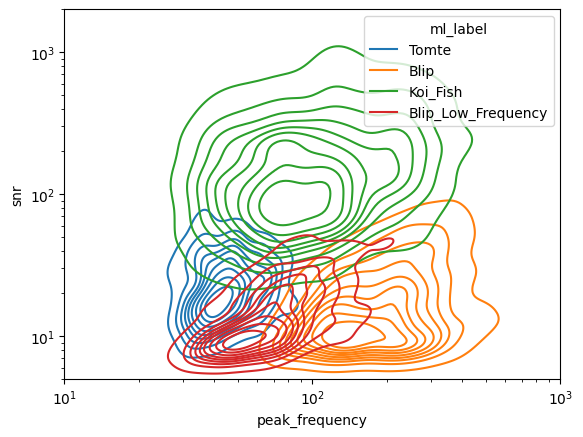

In [36]:
sns.kdeplot(gspy.query("ifo == 'H1'"),
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

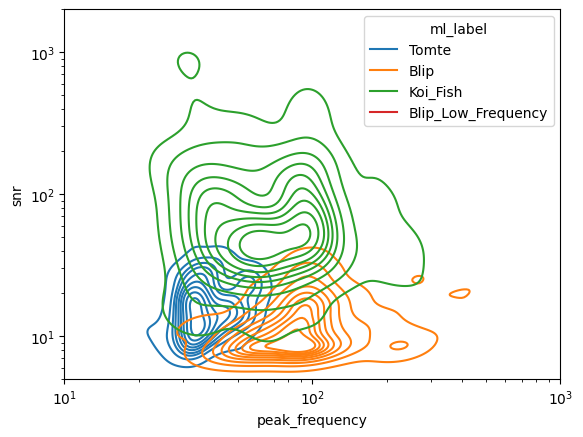

In [35]:
sns.kdeplot(gspy.query("ifo == 'V1'"),
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(10, 20000.0)

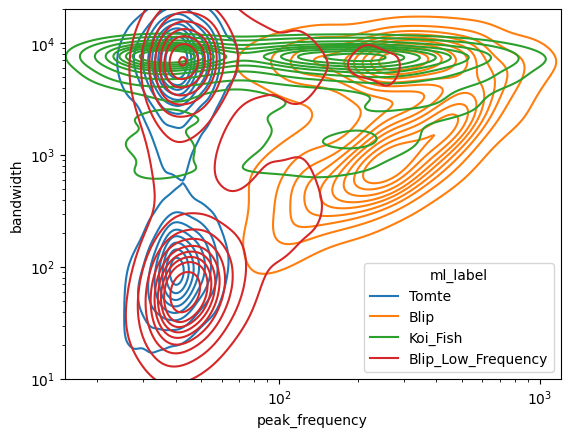

In [51]:
fig = sns.kdeplot(gspy.query("ifo == 'L1'"),
                x='peak_frequency', y='bandwidth',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
sns.move_legend(fig, loc='lower right')
plt.xlim(15,1200)
plt.ylim(10,2e4)

(10, 20000.0)

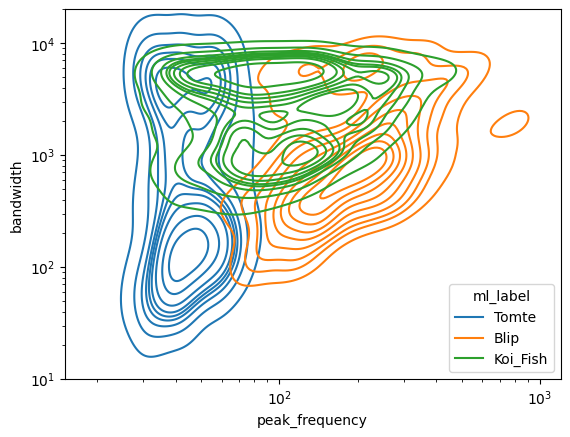

In [56]:
fig = sns.kdeplot(gspy.query("ifo == 'H1'"),
                x='peak_frequency', y='bandwidth',
                hue='ml_label', hue_order=ml_types[:-1],
                log_scale=True, common_norm=False)
sns.move_legend(fig, loc='lower right')
plt.xlim(15,1200)
plt.ylim(10,2e4)

(10, 20000.0)

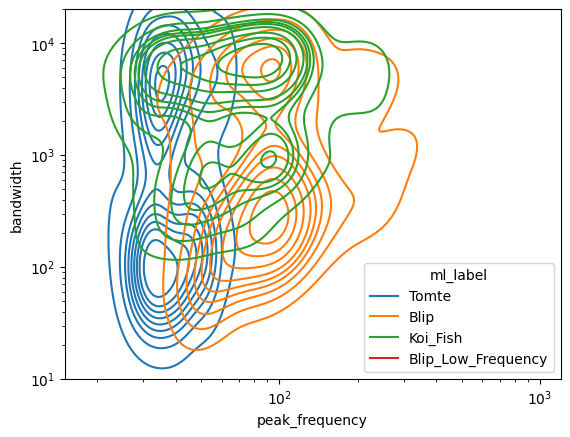

In [52]:
fig = sns.kdeplot(gspy.query("ifo == 'V1'"),
                x='peak_frequency', y='bandwidth',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
sns.move_legend(fig, loc='lower right')
plt.xlim(15,1200)
plt.ylim(10,2e4)